<a href="https://colab.research.google.com/github/openmymai/TensorFlowCert/blob/main/04_Computer_Vision_and_CNN_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Cmputer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

### Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-05-13 10:00:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.5MB/s    in 5.6s    

2023-05-13 10:00:14 (18.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data

**Crutial step for any ML Project**

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# Another way to find out how many images
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

### To visualize our images

In [ ]:
# Get the classnames
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class_names
print(class_names)

['pizza' 'steak']


In [11]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class
  
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


['3643951.jpg']
Image shape: (512, 512, 3)


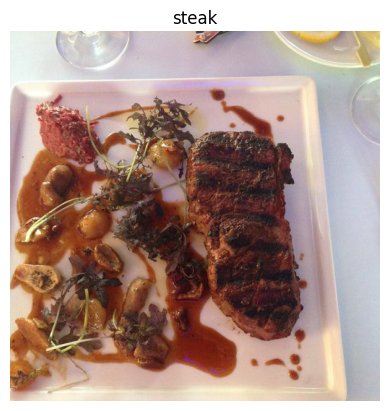

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class="steak")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[228, 238, 230],
        [230, 240, 232],
        [231, 241, 233],
        ...,
        [212, 185, 108],
        [217, 190, 111],
        [220, 193, 114]],

       [[229, 239, 231],
        [231, 241, 233],
        [232, 242, 234],
        ...,
        [226, 199, 122],
        [232, 205, 126],
        [236, 209, 130]],

       [[231, 241, 233],
        [233, 243, 235],
        [233, 243, 235],
        ...,
        [231, 204, 125],
        [235, 208, 129],
        [237, 210, 131]],

       ...,

       [[231, 204, 177],
        [230, 203, 176],
        [227, 200, 173],
        ...,
        [193, 193, 193],
        [194, 194, 194],
        [195, 195, 195]],

       [[234, 209, 179],
        [233, 208, 178],
        [231, 205, 178],
        ...,
        [194, 194, 192],
        [194, 194, 194],
        [194, 194, 194]],

       [[239, 216, 185],
        [238, 215, 184],
        [236, 212, 184],
        ...,
        [195, 194, 19

In [ ]:
img.shape # return width, height, color channels

(512, 512, 3)

**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with
to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also 
referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [ ]:
img/255.

array([[[0.89411765, 0.93333333, 0.90196078],
        [0.90196078, 0.94117647, 0.90980392],
        [0.90588235, 0.94509804, 0.91372549],
        ...,
        [0.83137255, 0.7254902 , 0.42352941],
        [0.85098039, 0.74509804, 0.43529412],
        [0.8627451 , 0.75686275, 0.44705882]],

       [[0.89803922, 0.9372549 , 0.90588235],
        [0.90588235, 0.94509804, 0.91372549],
        [0.90980392, 0.94901961, 0.91764706],
        ...,
        [0.88627451, 0.78039216, 0.47843137],
        [0.90980392, 0.80392157, 0.49411765],
        [0.9254902 , 0.81960784, 0.50980392]],

       [[0.90588235, 0.94509804, 0.91372549],
        [0.91372549, 0.95294118, 0.92156863],
        [0.91372549, 0.95294118, 0.92156863],
        ...,
        [0.90588235, 0.8       , 0.49019608],
        [0.92156863, 0.81568627, 0.50588235],
        [0.92941176, 0.82352941, 0.51372549]],

       ...,

       [[0.90588235, 0.8       , 0.69411765],
        [0.90196078, 0.79607843, 0.69019608],
        [0.89019608, 0

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, more specifically:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32, # common size
                                               target_size=(224, 224), # common shape to use
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:


# Build a CNN model (same as the Tiny VGG on the CNN on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

# len(train_data) = 47 -> 1500 (images)/32 (batch size) = 46.875(47)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 29s 348ms/step - loss: 0.5822 - accuracy: 0.6893 - val_loss: 0.3936 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4313 - accuracy: 0.7987 - val_loss: 0.3541 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4065 - accuracy: 0.8220 - val_loss: 0.3549 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 15s 314ms/step - loss: 0.3734 - accuracy: 0.8340 - val_loss: 0.3133 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 13s 272ms/step - loss: 0.3414 - accuracy: 0.8620 - val_loss: 0.3062 - val_accuracy: 0.8640


In [ ]:
len(train_data)

47

In [ ]:
model_1.summary()

NameError: ignored

### Despite having 20x more parameters than our CNN(model_1), model_2 performs terribly.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# omitted model_2
# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 228ms/step - loss: 2.8758 - accuracy: 0.6320 - val_loss: 1.1074 - val_accuracy: 0.6300
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.7456 - accuracy: 0.7180 - val_loss: 0.5726 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6842 - accuracy: 0.7387 - val_loss: 0.5308 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 13s 273ms/step - loss: 0.6931 - accuracy: 0.7213 - val_loss: 0.4483 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.5626 - accuracy: 0.7580 - val_loss: 0.5012 - val_accuracy: 0.7640


In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
15000000/31000 # model_3 parameters/model_1 parameters

483.8709677419355

### Binary classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with data



['3577732.jpg']
Image shape: (512, 512, 3)
['1105700.jpg']
Image shape: (512, 512, 3)


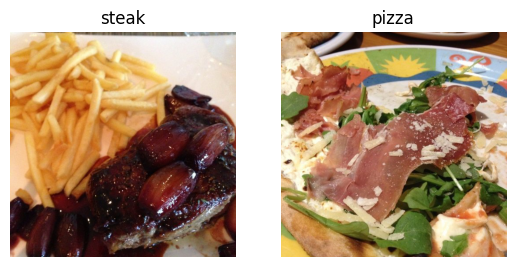

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data

In [ ]:
# Create train and test data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32 # size / batch_size

46.875

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.49411768, 0.40784317, 0.3254902 ],
          [0.49411768, 0.4039216 , 0.34901962],
          [0.49803925, 0.40784317, 0.34509805],
          ...,
          [0.0627451 , 0.03921569, 0.04705883],
          [0.1137255 , 0.09019608, 0.09803922],
          [0.09803922, 0.07450981, 0.08235294]],
 
         [[0.5058824 , 0.42352945, 0.35686275],
          [0.5019608 , 0.4156863 , 0.36078432],
          [0.5019608 , 0.4156863 , 0.36078432],
          ...,
          [0.10980393, 0.08627451, 0.09411766],
          [0.12156864, 0.09803922, 0.10588236],
          [0.10588236, 0.08235294, 0.09019608]],
 
         [[0.5137255 , 0.427451  , 0.37647063],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.50980395, 0.427451  , 0.36078432],
          ...,
          [0.10980393, 0.06666667, 0.08235294],
          [0.12156864, 0.08627451, 0.09803922],
          [0.10980393, 0.08627451, 0.09411766]],
 
         ...,
 
         [[0.18039216, 0.13333334, 0.13333334],
          [0.20392

In [ ]:
# View the first batch of labels
labels

array([0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

# Create a CNN model (start with a base line)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural networks)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary our model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
# Check the length of training and test data generator
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # the combination of training and label
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 257ms/step - loss: 0.7775 - accuracy: 0.5847 - val_loss: 0.5808 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 11s 236ms/step - loss: 0.5138 - accuracy: 0.7567 - val_loss: 0.4642 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 13s 272ms/step - loss: 0.4337 - accuracy: 0.8160 - val_loss: 0.5327 - val_accuracy: 0.7200
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3618 - accuracy: 0.8507 - val_loss: 0.4015 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 0.2157 - accuracy: 0.9313 - val_loss: 0.4795 - val_accuracy: 0.7900


<Axes: >

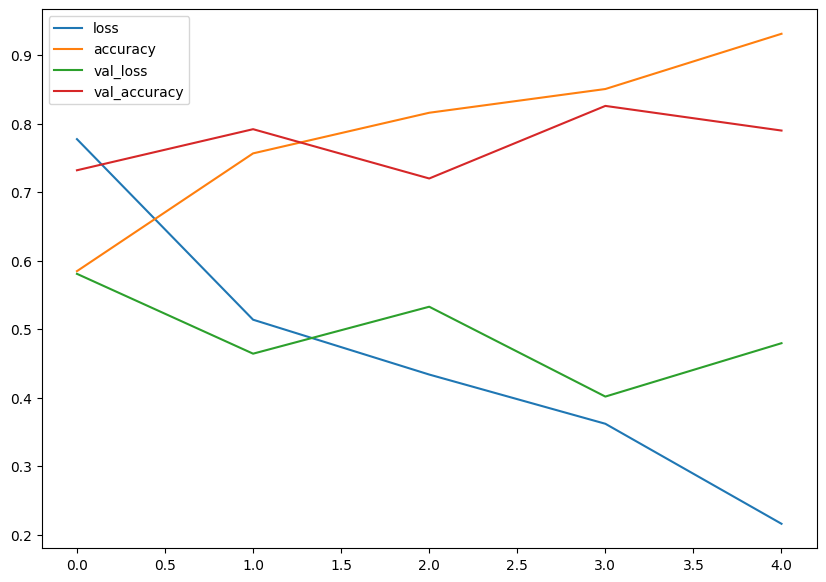

In [ ]:
# Evaluating the model
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [27]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss=history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()



>when the model's validation loss start to increase it's likely that the model is **overfitting**

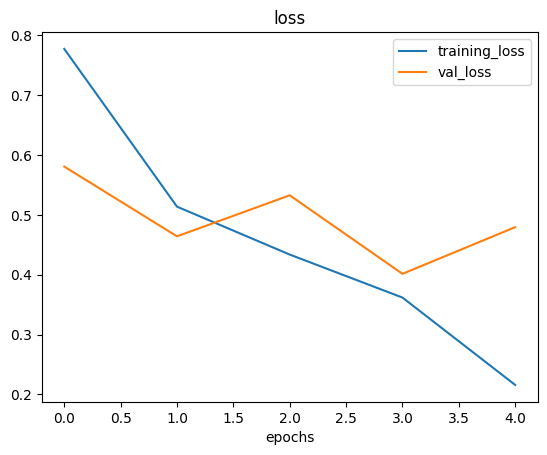

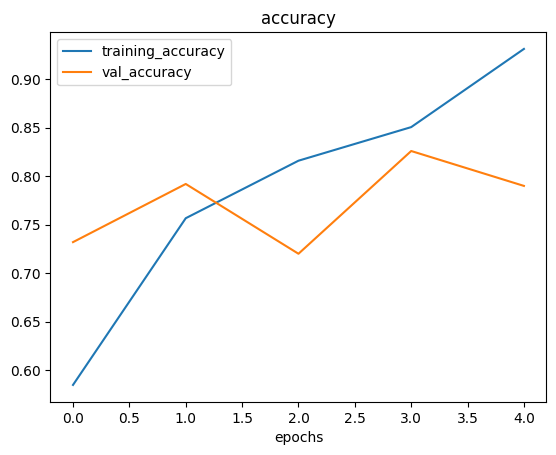

In [ ]:
# Check out the loss and accuracy
plot_loss_curves(history_4)

### 6. Adjust the model parameters

* Create the baseline
* Beat the baseline by overfitting a larger model
* Reduce overfitting

Ways to induce overfitting:
* Increase the no. of conv layers
* Increate the no. of conv filters
* Add another dense layer to the output of our flatten layer

Reduce overfitting
* Add data augmentation
* Add regularalization layers (such as MaxPooling
* Add more data


In [ ]:
# Create the model
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 264ms/step - loss: 0.6306 - accuracy: 0.6693 - val_loss: 0.5120 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 12s 263ms/step - loss: 0.4698 - accuracy: 0.7873 - val_loss: 0.4147 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4421 - accuracy: 0.8060 - val_loss: 0.4084 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4447 - accuracy: 0.8060 - val_loss: 0.3627 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 13s 285ms/step - loss: 0.3943 - accuracy: 0.8367 - val_loss: 0.3742 - val_accuracy: 0.8440


In [ ]:
# Model summary
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

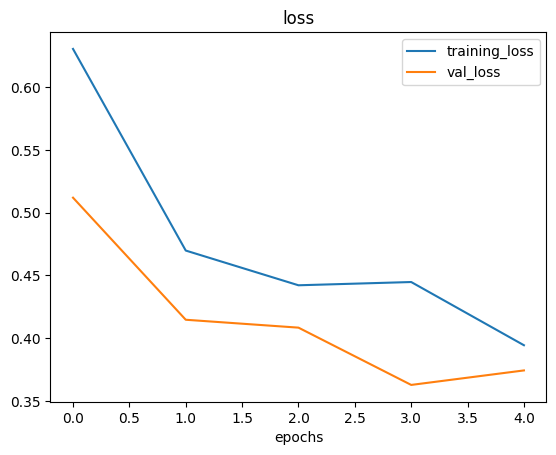

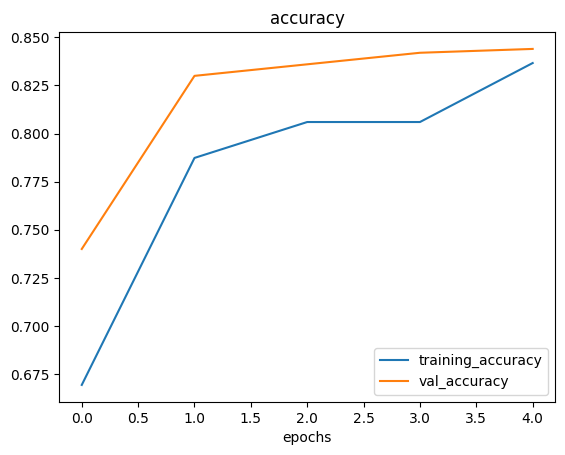

In [ ]:
# plot loss curve
plot_loss_curves(history_5)

### Opening our bag of trick and finding data augmentation

In [ ]:
# Create ImageDataGenerator training with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augment training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demo only

# Create non augment train data batches
print("Non-augmented train data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                              batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Augment training data
Found 1500 images belonging to 2 classes.
Non-augmented train data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augemented_labels = train_data_augmented.next()

showing image number: 3


(-0.5, 223.5, 223.5, -0.5)

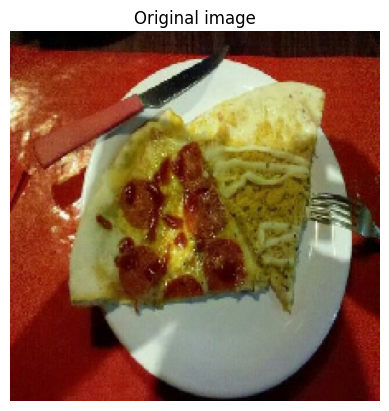

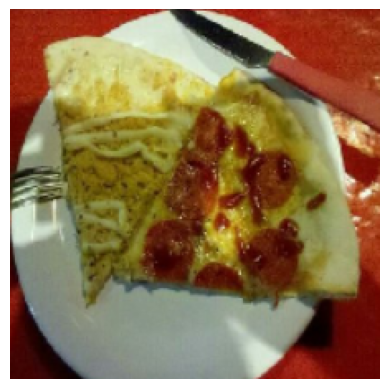

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch size = 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.axis(False)

# Multiclass Image Classification - CNN

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

# 1. Become one with the data

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-05-19 04:35:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.6MB/s    in 22s     

2023-05-19 04:36:20 (22.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [6]:
!ls -al 10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 May 19 04:36 .
drwxr-xr-x  1 root root 4096 May 19 04:36 ..
drwxr-xr-x 12 root root 4096 May 19 04:36 test
drwxr-xr-x 12 root root 4096 May 19 04:36 train


In [7]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [9]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['972000.jpg']
Image shape: (512, 512, 3)


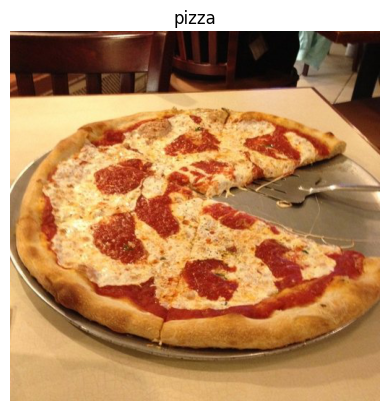

In [12]:
# Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))


# 2. Preprocess the data (prepare it for model)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# 3. Create a model (strat with a baseline)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224,224, 3)), 
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 4. Fit the model

In [22]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 68s 240ms/step - loss: 2.2049 - accuracy: 0.1816 - val_loss: 2.0756 - val_accuracy: 0.2588
Epoch 2/5
235/235 [==============================] - 54s 228ms/step - loss: 1.9618 - accuracy: 0.3231 - val_loss: 1.9601 - val_accuracy: 0.3088
Epoch 3/5
235/235 [==============================] - 54s 231ms/step - loss: 1.6375 - accuracy: 0.4513 - val_loss: 2.1054 - val_accuracy: 0.2796
Epoch 4/5
235/235 [==============================] - 61s 260ms/step - loss: 1.0434 - accuracy: 0.6644 - val_loss: 2.4505 - val_accuracy: 0.2624
Epoch 5/5
235/235 [==============================] - 52s 221ms/step - loss: 0.4345 - accuracy: 0.8631 - val_loss: 3.6869 - val_accuracy: 0.2376


In [23]:
len(train_data)

235

# 5. Evaluate the model

In [24]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 3.6869 - accuracy: 0.2376


[3.686905860900879, 0.23759999871253967]

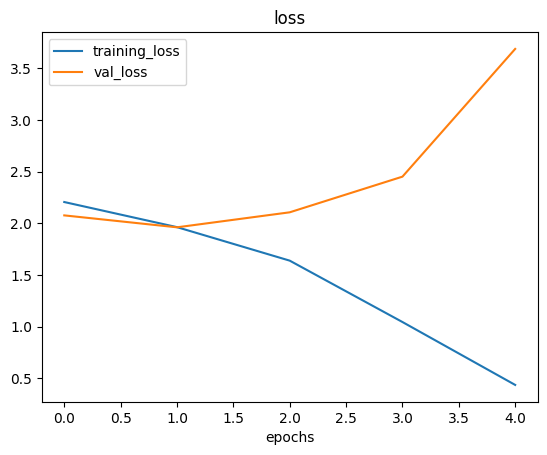

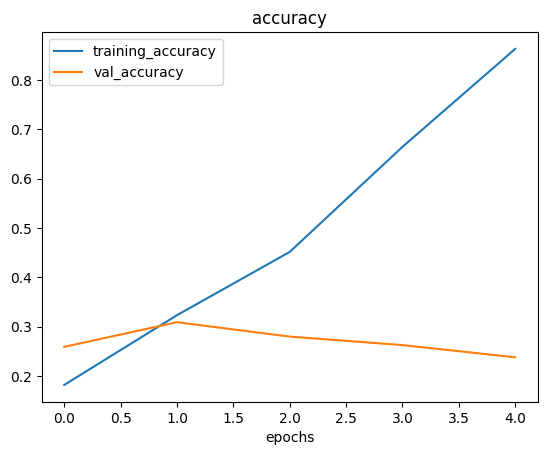

In [28]:
# Check out the model's loss curve
plot_loss_curves(history_8)

What do these loss curves tell us?

Well, it seems our model is **overfitting** the training set quite badly, in other words, it's getting great results on the  training data but fais to generalize well to unseen data and performns poorly on the test dataset.

# 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning somthing.

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by..
- Get more data
- Simplify the model
- Data Augmentation
- Use transfer learning

In [34]:
# How about we try and simplify the model first.
# Let's try to remove 2 Conv2D

model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [38]:
# Fit the model with 2x Conv2D
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 241ms/step - loss: 0.1895 - accuracy: 0.9584 - val_loss: 3.3039 - val_accuracy: 0.2992
Epoch 2/5
235/235 [==============================] - 60s 257ms/step - loss: 0.0821 - accuracy: 0.9885 - val_loss: 3.9341 - val_accuracy: 0.2808
Epoch 3/5
235/235 [==============================] - 61s 260ms/step - loss: 0.0335 - accuracy: 0.9973 - val_loss: 4.2541 - val_accuracy: 0.2920
Epoch 4/5
235/235 [==============================] - 50s 211ms/step - loss: 0.0124 - accuracy: 0.9996 - val_loss: 4.7065 - val_accuracy: 0.2880
Epoch 5/5
235/235 [==============================] - 50s 213ms/step - loss: 0.0470 - accuracy: 0.9884 - val_loss: 4.7131 - val_accuracy: 0.2624


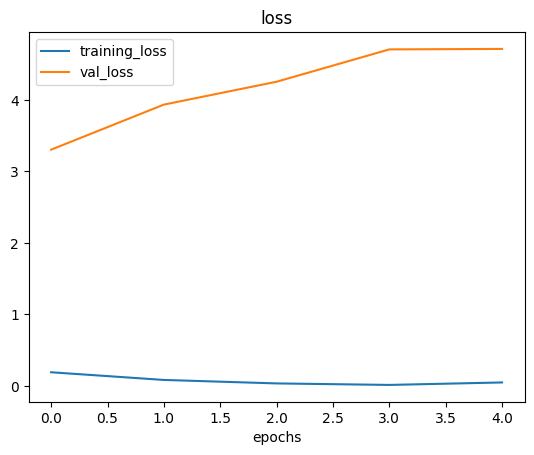

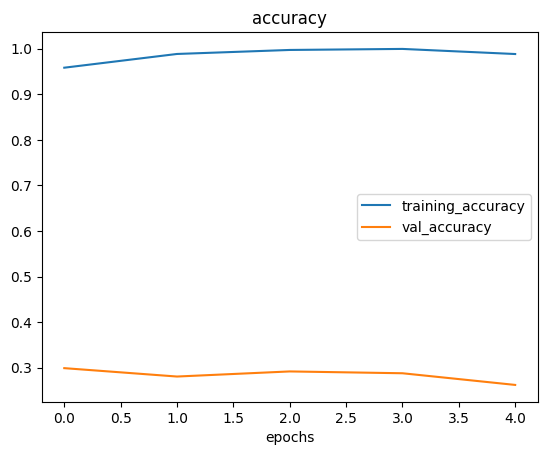

In [40]:
plot_loss_curves(history_9)

Seem like simplifying the model experiment didn't work.

* The accuracy went down and overfitting contied.

So, try data augmentation.

In [33]:
model_9.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [30]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [43]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [44]:
model_10 = tf.keras.models.clone_model(model_8)

In [45]:
# Compile the cloned model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [46]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [49]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 129s 540ms/step - loss: 2.2380 - accuracy: 0.1635 - val_loss: 2.1660 - val_accuracy: 0.2240
Epoch 2/5
235/235 [==============================] - 124s 525ms/step - loss: 2.0905 - accuracy: 0.2524 - val_loss: 1.9374 - val_accuracy: 0.3232
Epoch 3/5
235/235 [==============================] - 124s 529ms/step - loss: 2.0109 - accuracy: 0.2869 - val_loss: 1.8873 - val_accuracy: 0.3576
Epoch 4/5
235/235 [==============================] - 123s 524ms/step - loss: 1.9735 - accuracy: 0.3148 - val_loss: 1.8216 - val_accuracy: 0.3448
Epoch 5/5
235/235 [==============================] - 123s 524ms/step - loss: 1.9468 - accuracy: 0.3345 - val_loss: 1.8133 - val_accuracy: 0.3896


In [50]:
model_8.evaluate(test_data)

79/79 [==============================] - 17s 219ms/step - loss: 3.6869 - accuracy: 0.2376


[3.686905860900879, 0.23759999871253967]

In [51]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 1.8133 - accuracy: 0.3896


[1.8132941722869873, 0.38960000872612]

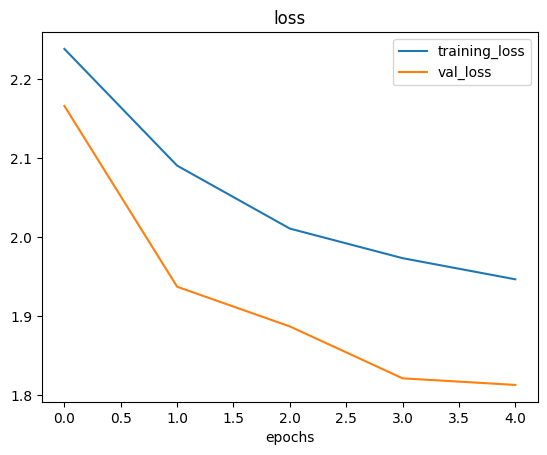

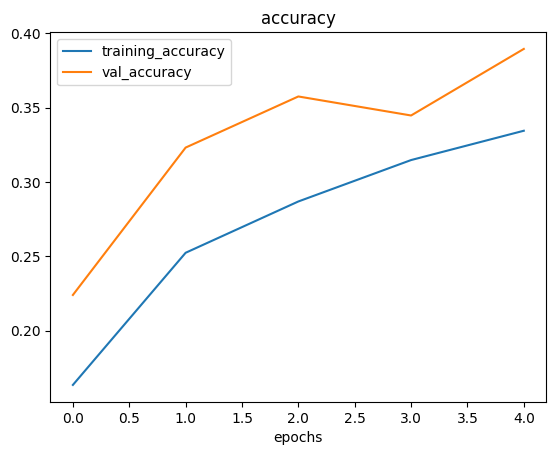

In [52]:
plot_loss_curves(history_10)